In [ ]:
!git clone https://github.com/anminhhung/small_dog_cat_dataset

fatal: destination path 'small_dog_cat_dataset' already exists and is not an empty directory.


# Reading images

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

folder_path_dog = "small_dog_cat_dataset/train/dogs"

# Get a list of all files in the folder
file_list_dog = os.listdir(folder_path_dog)
image_list_dog = []
image_list_cat = []

# Loop through the files in the folder
for file_name in file_list_dog:
    # Check if the file is an image (you can add more image extensions if needed)
    if file_name.endswith((".jpg", ".jpeg", ".png")):
        # Construct the full path to the image file
        image_path = os.path.join(folder_path_dog, file_name)

        # Read the image
        image = cv2.imread(image_path)

        image_list_dog.append(image)




#print(file_list_dog)

folder_path_cat = "small_dog_cat_dataset/train/cats"

file_list_cat = os.listdir(folder_path_cat)

for file in file_list_cat:
  if file.endswith((".jpg", ".png", ".jpeg")):
    image_path = os.path.join(folder_path_cat, file)

    image = cv2.imread(image_path)

    image_list_cat.append(image)

#print(file_list_cat)




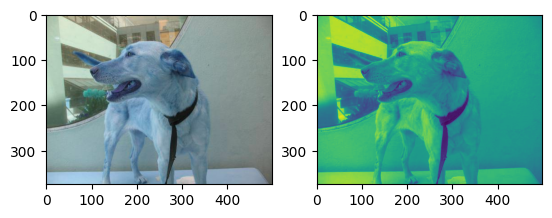

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(image_list_dog[0])
grey = cv2.cvtColor(image_list_dog[0], cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(grey)


In [ ]:
gx = cv2.Sobel(grey, cv2.CV_32F, dx=0, dy=1, ksize=3)
gy = cv2.Sobel(grey, cv2.CV_32F, dx=1, dy=0, ksize=3)

print('gray shape: {}'.format(grey.shape))
print('gx shape: {}'.format(gx.shape))
print('gy shape: {}'.format(gy.shape))

gray shape: (375, 499)
gx shape: (375, 499)
gy shape: (375, 499)


In [ ]:
g, theta = cv2.cartToPolar(gx, gy, angleInDegrees=True)

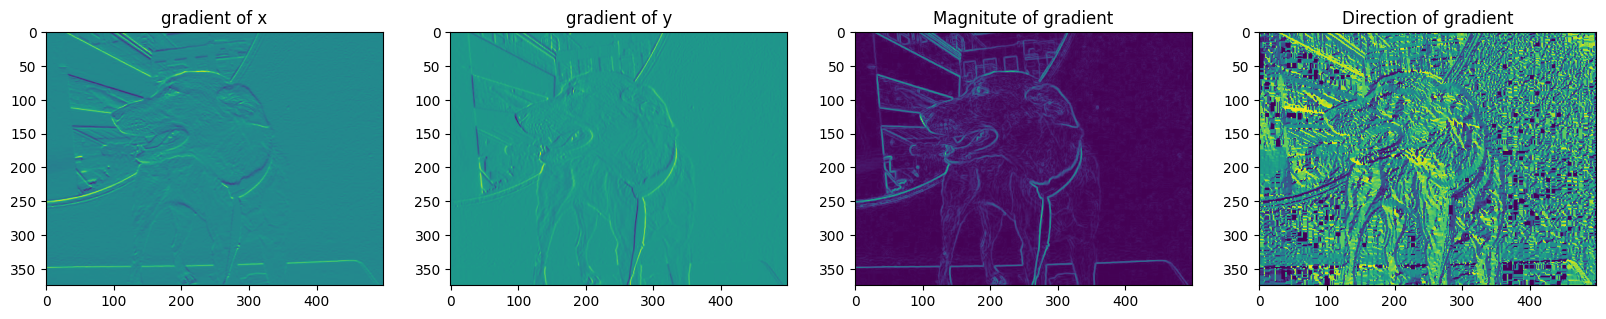

In [ ]:
w = 20
h = 10

plt.figure(figsize=(w, h))
plt.subplot(1, 4, 1)
plt.title('gradient of x')
plt.imshow(gx)

plt.subplot(1, 4, 2)
plt.title('gradient of y')
plt.imshow(gy)

plt.subplot(1, 4, 3)
plt.title('Magnitute of gradient')
plt.imshow(g)

plt.subplot(1, 4, 4)
plt.title('Direction of gradient')
plt.imshow(theta)

# Feature extraction

In [ ]:
import glob
import cv2
import imutils
from skimage import feature

def _preprocessing(fileType):
    data = []
    labels = []
    for path in glob.glob(fileType):
        brand = path.split('/')[2]  # Extract the label from the directory name

        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edged = imutils.auto_canny(gray)

        # Find contours in the edge map, keep only the largest contour assumed to contain the car logo.
        cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        if len(cnts) > 0:
                c = max(cnts, key=cv2.contourArea)

                # Extract the car logo and resize it to 200x200 pixels.
                (x, y, w, h) = cv2.boundingRect(c)
                logo = gray[y:y + h, x:x + w]
                logo = cv2.resize(logo, (200, 200))

                # Initialize the HOG descriptor.
                H = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),
                                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")

                # Update the data and labels.
                data.append(H)
                labels.append(brand)
    return data, labels

fileTypes = 'small_dog_cat_dataset/train/**/*.jpg'
data, labels = _preprocessing(fileTypes)


In [ ]:

print(labels)
import pickle

def _save(path, obj):
    with open(path, 'wb') as fn:
        pickle.dump(obj, fn)

['dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs',

In [ ]:
from sklearn.preprocessing import LabelEncoder

def _transform_data(data, labels):
    # Tạo input array X
    X = np.array(data)
    # Tạo output array y
    le = LabelEncoder()
    le.fit(labels)
    y = le.transform(labels)
    y_ind = np.unique(y)
    y_dict = dict(zip(y_ind, le.classes_))
    return X, y, y_dict, le

X_train, y_train, y_dict, le = _transform_data(data, labels)
print(y_train)



[1 1 1 ... 0 0 0]


# Train Logistic Regression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
# Kiểm tra độ chính xác của mô hình trên train
from sklearn.metrics import classification_report
uniq_labels = list(y_dict.values())
print(classification_report(y_train, y_pred, target_names = uniq_labels))

              precision    recall  f1-score   support

        cats       1.00      1.00      1.00      1000
        dogs       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
dataTest, labelsTest = _preprocessing('small_dog_cat_dataset/test/**/*.jpg')
X_test, y_test, y_dict, le = _transform_data(dataTest, labelsTest)




In [ ]:
y_predTest = model.predict(X_test)
from sklearn.metrics import classification_report
uniq_labels = list(y_dict.values())
print(classification_report(y_test, y_predTest, target_names = uniq_labels))

              precision    recall  f1-score   support

        cats       0.60      0.26      0.36       299
        dogs       0.53      0.83      0.65       300

    accuracy                           0.54       599
   macro avg       0.57      0.54      0.50       599
weighted avg       0.57      0.54      0.50       599



# Predict